In [48]:
%load_ext autoreload
%autoreload 2

from utils import read_diabetes_dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import pygam
import numpy as np
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
X, y = read_diabetes_dataset(binary=True, use_paper_setup=False)

X_tv, X_test, y_tv, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, random_state=42)


In [31]:
clf_dt = DecisionTreeClassifier(max_depth=4, random_state=123, class_weight=None)
clf_dt.fit(X_train, y_train);

In [32]:
y_test_ = clf_dt.predict(X_test)
bacc = balanced_accuracy_score(y_test, y_test_)
print('Balanced accuracy score: {}'.format(bacc))

Balanced accuracy score: 0.5565322639265103


In [33]:
text_representation = tree.export_text(clf_dt, feature_names=list(X.columns))
print(text_representation)

|--- number_inpatient <= 0.50
|   |--- number_diagnoses <= 5.50
|   |   |--- age <= 70.00
|   |   |   |--- number_emergency <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- number_emergency >  0.50
|   |   |   |   |--- class: 0
|   |   |--- age >  70.00
|   |   |   |--- admission_7 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- admission_7 >  0.50
|   |   |   |   |--- class: 0
|   |--- number_diagnoses >  5.50
|   |   |--- discharge_11 <= 0.50
|   |   |   |--- number_outpatient <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- number_outpatient >  0.50
|   |   |   |   |--- class: 1
|   |   |--- discharge_11 >  0.50
|   |   |   |--- class: 0
|--- number_inpatient >  0.50
|   |--- discharge_11 <= 0.50
|   |   |--- number_inpatient <= 1.50
|   |   |   |--- num_lab_procedures <= 34.50
|   |   |   |   |--- class: 0
|   |   |   |--- num_lab_procedures >  34.50
|   |   |   |   |--- class: 1
|   |   |--- number_inpatient >  1.50
|   |   |   |--- discharge_1 <= 0.50
|   |   |

/home/texs/anaconda3/envs/rapidsml/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


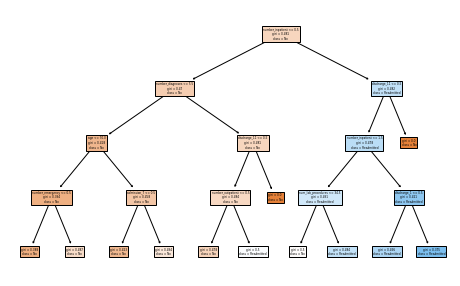

In [41]:
def replace_text(obj):
    if type(obj) == matplotlib.text.Annotation:
        txt = obj.get_text()
        txt = re.sub("\nsamples[^$]*class","\nclass",txt)
        obj.set_text(txt)
    return obj
    

# plt.figure(figsize=(15,15))
fig, ax = plt.subplots(figsize=(8,5))
tree.plot_tree(clf_dt, feature_names=list(X.columns), class_names=['No', 'Readmitted'], filled = True)
ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]
fig.show()
plt.savefig('decision_tree', dpi=200)

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_tr = scaler.transform(X_train)
X_test_tr = scaler.transform(X_test)
X_val_tr = scaler.transform(X_val)


clf_log = LogisticRegression(class_weight=None, max_iter=10**3)

clf_log.fit(X_train_tr, y_train);

y_test_ = clf_log.predict(X_test_tr)
balanced_accuracy_score(y_test, y_test_)

0.5638197432166705

In [51]:
feat_pd = pd.DataFrame(clf_log.coef_.T, columns=['Feature Importance'], index=X.columns)
feat_pd['Feature Importance'] = np.abs(feat_pd['Feature Importance'])
feat_pd = feat_pd.sort_values(by='Feature Importance', ascending=False)
feat_pd

,Feature Importance
number_inpatient,5.306759
number_emergency,5.222557
discharge_11,4.289600
number_outpatient,2.541597
discharge_14,1.978549
discharge_13,1.521235
weight,1.289817
discharge_15,1.203429
number_diagnoses,1.015652
discharge_28,0.968913


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:21 ETA:   0:03:37
 18% (2 of 11) |####                     | Elapsed Time: 0:00:35 ETA:   0:02:03
 27% (3 of 11) |######                   | Elapsed Time: 0:00:49 ETA:   0:01:50
 36% (4 of 11) |#########                | Elapsed Time: 0:01:03 ETA:   0:01:37
 45% (5 of 11) |###########              | Elapsed Time: 0:01:18 ETA:   0:01:30
 54% (6 of 11) |#############            | Elapsed Time: 0:01:32 ETA:   0:01:10
 63% (7 of 11) |###############          | Elapsed Time: 0:01:44 ETA:   0:00:46
 72% (8 of 11) |##################       | Elapsed Time: 0:01:55 ETA:   0:00:34
 81% (9 of 11) |####################     | Elapsed Time: 0:02:07 ETA:   0:00:23
 90% (10 of 11) |#####################   | Elapsed Time: 0:02:22 ETA:   0:00:14
100% (11 of 11) |########################| Elapsed Time: 0:02:31 Time:  0:02:31


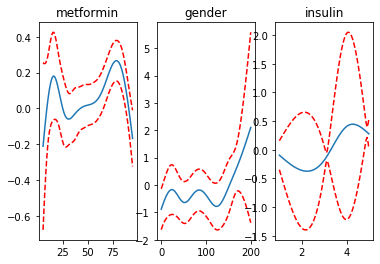

In [42]:
gam = pygam.LogisticGAM().gridsearch(X_train.values, y_train)

fig, axs = plt.subplots(1, 3)
idxs = [1, 2, 3]
titles = ['metformin', 'gender', 'insulin']

for i, ax in enumerate(axs):
    idx = idxs[i]
    XX = gam.generate_X_grid(term=idx)
    pdep, confi = gam.partial_dependence(term=idx, width=.95)

    ax.plot(XX[:, idx], pdep)
    ax.plot(XX[:, idx], confi, c='r', ls='--')
    ax.set_title(titles[i])